In [2]:
import numpy as np

eps_N = -3
eps_G = -4
eps_A = -1
eps_NA = -1

eps_G_max = eps_N - np.log((1+np.exp(-eps_A)+np.exp(-eps_A-eps_NA))/(1+np.exp(-eps_A)))
eps_G_max2 = eps_N - np.log(np.exp(-eps_NA)-1)
print(-eps_N, -eps_G_max, -eps_G_max2)

3 4.094344276926158 3.541324854612918


In [5]:
import numpy as np
A=np.array([[1,1,1],[1,1,1]])
A[:,1]

array([1, 1])

0.26401558741392617 0.2640155874139923


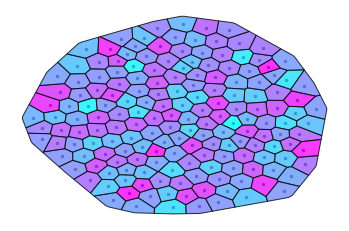

In [6]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)

def connectivity(FVmesh):
    X = np.zeros([FVmesh.nofCells, FVmesh.nofCells])

    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            X[i,j] += 1/len(FVmesh.Neigh[i])
 
    return X


X = connectivity(FVmesh)
eta_n = np.exp(3)
eta_g = np.exp(4)
eta_a = np.exp(1)
eta_na = np.exp(1)

A = np.eye(FVmesh.nofCells) + eta_a*X
b = np.dot(X, np.ones(FVmesh.nofCells))*(1-1/eta_g)

a = np.linalg.solve(A, b)
g = np.linalg.solve(X, a)

print(min(g), max(g))
FVmesh.plot(g)

In [9]:
from sympy import *
x, a = symbols('x, a')

p = x*a/(1+(x)*a)
integrate(p, a)

x*(a/x - log(a*x + 1)/x**2)

2.718281828459045


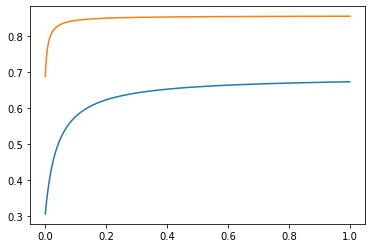

In [62]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(4)
eta_b = np.exp(3)
eta_c = np.exp(2)
eta = np.exp(1)

b = 0.2
c = 0.3
a = np.linspace(0,1,1000)

eta2 = eta#1/(eta_a*a)*((1+eta_a*a)**2/(1+eta_b*b + eta_a*a) - 1)  #np.exp(-3)
print(eta2)

p_C1 = eta_c*c*(1+eta_a*a)/(1 + eta_c*c*(1+eta_a*a) + eta_b*b + eta_a*a)
p_C2 = eta_c*c*(1+eta_a*eta2*a)/(1 + eta_c*c*(1+eta_a*eta2*a) + eta_a*a)
#p_C3 = eta_c*c/(1 + eta_c*c)

plt.plot(a, p_C1)
plt.plot(a, p_C2)
#plt.plot(c, p_C3, 'k--')

False


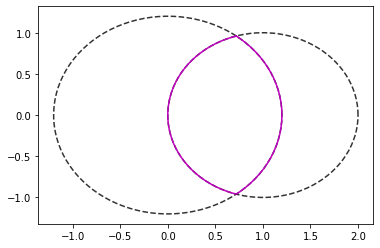

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

TE1 = lambda theta: 1.2*np.array([1*np.cos(theta),1*np.sin(theta)]).T
TE2 = lambda theta: np.array([1*np.cos(theta) + 1,1*np.sin(theta)]).T

TEvals1 = TE1(np.linspace(0,2*np.pi, 100))
TEpoly1 = Polygon(TEvals1)

TEvals2 = TE2(np.linspace(0,2*np.pi, 100))
TEpoly2 = Polygon(TEvals2)

poly = TEpoly1.intersection(TEpoly2)
print(poly.is_empty)


x,y = TEpoly1.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = TEpoly2.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = poly.exterior.xy
plt.plot(x,y, 'm')

In [29]:
from scipy.spatial.distance import cdist

a = np.random.rand(6)

print(a, np.maximum(a, 1))

[0.51356955 0.9835461  0.15751447 0.63753187 0.30684477 0.88062042] [1. 1. 1. 1. 1. 1.]


In [70]:
a=np.linspace(0,100,5)
np.tile(a,(2,1)).T

array([[  0.,   0.],
       [ 25.,  25.],
       [ 50.,  50.],
       [ 75.,  75.],
       [100., 100.]])

<Figure size 432x288 with 0 Axes>

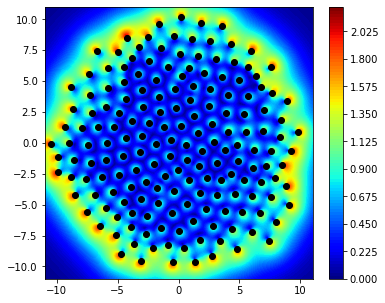

In [44]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

plt.figure()

def f(x):
    return np.exp(-.9*x)
    

def velocity(x,y,pos):
    norm = ((x-pos[0])**2 + (y-pos[1])**2)**(1/2)
    u = (x-pos[0])/norm*f(norm)
    v = (y-pos[1])/norm*f(norm)
    
    u[(x-pos[0])**2 + (y-pos[1])**2 == 0] = 0
    v[(x-pos[0])**2 + (y-pos[1])**2 == 0] = 0
    
    return u, v

x = np.linspace(-11,11,300)
y = np.linspace(-11,11,300)
X,Y = np.meshgrid(x,y)

U = np.zeros(X.shape)
V = np.zeros(X.shape)
for p in Pos:
    dU, dV = velocity(X,Y,p)
    U += dU
    V += dV
    
plt.figure(figsize=(6,5))
#plt.quiver(X,Y,U,V)
plt.contourf(X,Y,(U**2+V**2)**(1/2),100, cmap = 'jet')
plt.colorbar()
plt.scatter(Pos[:,0],Pos[:,1], color='k')

1.5826193829450057


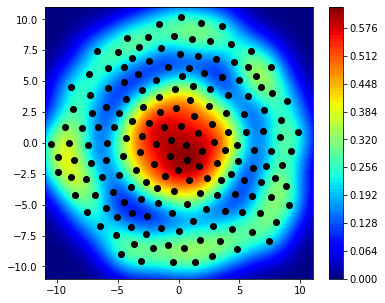

In [67]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

v = [0,0]
def signal(x,y,pos):
    val = ((x-pos[0])**2 + (y-pos[1])**2 - 2*v[0]*(x-pos[0]) - 2*v[1]*(y-pos[1]) + v[0]**2 + v[1]**2)
    D = 1
    s = 1/(4*np.pi*D)*np.exp(-val/(4*D))
    
    return s

x = np.linspace(-11,11,300)
y = np.linspace(-11,11,300)
X,Y = np.meshgrid(x,y)

S = np.zeros(X.shape)
for i in range(0,len(Pos)):
    if (Pos[i,0]**2 + Pos[i,1]**2)**(1/2) > 8 or (Pos[i,0]**2 + Pos[i,1]**2)**(1/2) < 5:
        S += signal(X,Y,Pos[i])
    
plt.figure(figsize=(6,5))
#plt.quiver(X,Y,U,V)
plt.contourf(X,Y,S, 100, cmap = 'jet')
plt.colorbar()
plt.scatter(Pos[:,0],Pos[:,1], color='k')
print(FVmesh.D_mean)

In [41]:
v = [0,10]
print(Pos)


[[ -4.36094285   3.59141365]
 [  6.73537679  -3.14578202]
 [  5.3716186    2.30796045]
 [ -3.33728559   5.5503607 ]
 [ -7.62120178  -2.89303505]
 [  6.967585     0.9935949 ]
 [  0.20272455  10.16085369]
 [ -8.9852504    0.02388038]
 [  5.24504192  -5.59718104]
 [ -1.74313509  -3.61480416]
 [ -4.77107727  -8.9825994 ]
 [  8.52936589  -1.77598956]
 [  1.58113174   0.77584491]
 [  0.61074212  -0.16298863]
 [ -4.22332438   8.52584377]
 [ -2.9847983    0.58642863]
 [ -5.98331676  -5.24555318]
 [  0.1314922    7.19778138]
 [  5.69588264   6.179363  ]
 [ -0.52727492  -5.70568358]
 [ -8.55444616  -1.36174523]
 [  4.40335349  -6.94240768]
 [ -3.4744086   -2.18601187]
 [  3.11891509  -1.60264478]
 [  6.71026689  -5.68467227]
 [  9.76621759   0.88482788]
 [ -0.34225977   8.67049561]
 [  2.35228747  -2.8424625 ]
 [ -7.36483137   5.56753521]
 [  4.04399304   3.84495179]
 [ -6.26923139  -2.781114  ]
 [  3.06231901   6.80499768]
 [ -6.8968304   -4.17757508]
 [  4.98322823   5.05920712]
 [  3.84155789

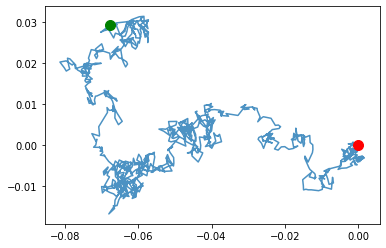

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
N = 1000
t = np.linspace(0,T,N)

v = 1
x = np.empty([len(t),2])
x[0] = [0,0]
for i in range(N-1):
    x[i+1] = x[i] + v*np.random.normal(0,t[i+1]-t[i],2)
    
plt.plot(x[:,0],x[:,1], alpha = 0.8)
plt.plot(x[0,0],x[0,1], 'ro', ms = 10)
plt.plot(x[-1,0],x[-1,1], 'go', ms = 10)

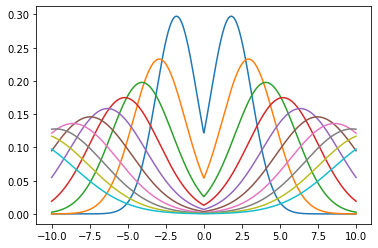

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kv

x0 = np.linspace(-10,10,1000)
T = np.linspace(0.3,2,10)
u = np.ones(len(x0))
u[x0<0] = -1
u *= 6
D = 3

for t in T:
    x = x0 - u*t
    #G1 = 3/(np.pi*t)**(1/2)*np.exp(-(x+4)**2/4/t)
    G2 = 1/(4*np.pi*D*t)**(1/2)*np.exp(-x**2/(4*D*t))
    #G3 = 4/(np.pi*t)**(1/2)*np.exp(-(x-4)**2/4/t)
    #plt.plot(x0,G1+G2+G3)
    plt.plot(x0,G2)

(0.0, 1.0)

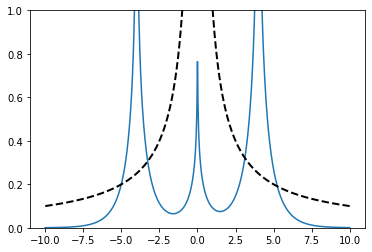

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

x = np.linspace(-10,10,1000)

l = 1
k = 1
mu = (u**2/4+k)**(1/2)
F1 = l*3/(2*np.pi)*kn(0,k**(1/2)*abs(x+4))
F2 = l*1/(2*np.pi)*kn(0,k**(1/2)*abs(x))
F3 = l*4/(2*np.pi)*kn(0,k**(1/2)*abs(x-4))
plt.plot(x,F1+F2+F3)
plt.plot(x,1/abs(x), '--k', lw = 2)
    
plt.ylim([0,1])

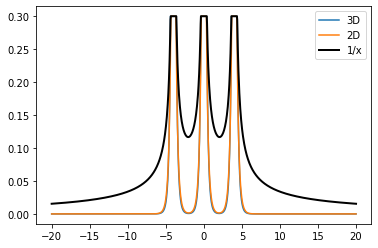

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kn

x = np.linspace(-20,20,1000)

k = 10
l = 50

F1 = l*.1*np.exp(-k**(1/2)*abs(x+4))/(4*np.pi*abs(x+4))
F2 = l*.1*np.exp(-k**(1/2)*abs(x))/(4*np.pi*abs(x))
F3 = l*.1*np.exp(-k**(1/2)*abs(x-4))/(4*np.pi*abs(x-4))
plt.plot(x,np.minimum(F1+F2+F3,.3))

F1_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x+4))
F2_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x))
F3_2D = l*.1/(2*np.pi)*kn(0,k**(1/2)*abs(x-4))
plt.plot(x,np.minimum(F1_2D+F2_2D+F3_2D,.3))

n = 1
F1_test = .1/abs(x+4)**n
F2_test = .1/abs(x)**n
F3_test = .1/abs(x-4)**n
plt.plot(x,np.minimum(F1_test+F2_test+F3_test,.3), color='k', lw = 2)
#plt.ylim([0,5])
plt.legend(['3D','2D','1/x'])

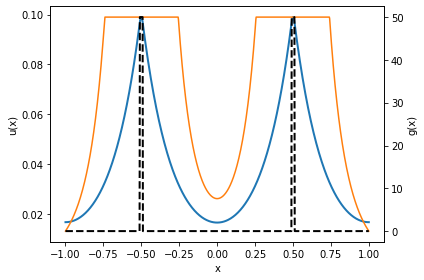

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

N = 1000
x = np.linspace(-1,1,N)
dx = x[1]-x[0]
D = 1
k = 5
epsilon = 0.01

#RHS = np.exp(-(x-x[250])**2/(2*epsilon))/(2*np.pi*epsilon)**(1/2) + np.exp(-(x-x[750])**2/(2*epsilon))/(2*np.pi*epsilon)**(1/2)
RHS = np.zeros(len(x))
RHS[(x > -0.5-epsilon) & (x < -0.5+epsilon)] = 1/2/epsilon
RHS[(x > 0.5-epsilon) & (x < 0.5+epsilon)] = 1/2/epsilon
RHS[0] = 0
RHS[-1] = 0

def Eq2Mat(eq, N):
    E = np.eye(N)
    Mat = np.empty([N,N])
    
    for i in range(N):
        Mat[:,i] = eq(E[:,i])

    return Mat
    
def lhs(u):
    val = np.zeros(N)
    val[1:-1] = D/dx**2*(-2*u[1:-1] +  u[2:] +  u[0:-2]) - k**2*u[1:-1]

    val[0] = (u[1]-u[0])/dx
    val[-1] = (u[-1]-u[-2])/dx

    
    return val

LHS = Eq2Mat(lhs, N)

u = np.linalg.solve(-LHS, RHS)


fig, ax1 = plt.subplots()
ax1.plot(x, u, lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')
F1 = np.exp(-k*abs(x-.5))/(4*np.pi*abs(x-.5))
F2 = np.exp(-k*abs(x+.5))/(4*np.pi*abs(x+.5))
ax1.plot(x,np.minimum(F1+F2,max(u)))

ax2 = ax1.twinx()
ax2.plot(x, RHS, '--k', lw=2)
ax2.set_ylabel('g(x)')

fig.tight_layout()
plt.show()    


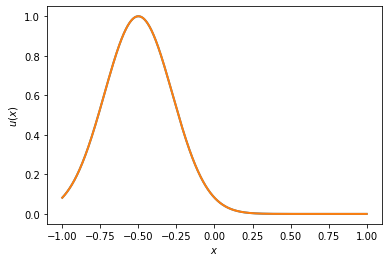

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


# Parameters
T = 20
Nt = 100
Nx = 1000
D = 0.01

# Discretization
t = np.linspace(0,T,Nt)
x = np.linspace(-1,1,Nx)
dt = t[1]-t[0]
dx = x[1]-x[0]

# Initial value
u0 = np.exp(-10*(x+0.5)**2)
Dx = D*np.ones(len(x))
DxL = np.roll(Dx,1)
DxR = np.roll(Dx,-1)

# Stating the right hand side

def f(u):
    return 1/(1-u+1e-7)/(u+1e-7)

def rhs_noflux(u, t):
    uL = np.roll(u,1)
    uR = np.roll(u,-1)
    
    jR = (uR-u)/dx*(DxR+Dx)/2
    jL = (u-uL)/dx*(Dx+DxL)/2
    
    # no flux boundary
    jR[-1] = 0
    jL[0] = 0
    return (jR-jL)/dx

def rhs_periodic(u, t):
    uL = np.roll(u,1)
    uR = np.roll(u,-1)
    
    jR = (uR-u)/dx*(DxR+Dx)/2
    jL = (u-uL)/dx*(Dx+DxL)/2
    
    return (jR-jL)/dx

# Solving the PDE
u = odeint(rhs_noflux, u0, t)
v = odeint(rhs_periodic, u0, t)

# Visualization
fig, ax = plt.subplots()
def update(i):
    plt.cla()
    plt.plot(x,u[i,:], linewidth=2)
    plt.plot(x,v[i,:], linewidth=2)
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.ylim(-0.05,1.05)
    
ani = FuncAnimation(fig, update, frames=Nt, interval=1)
HTML(ani.to_jshtml())

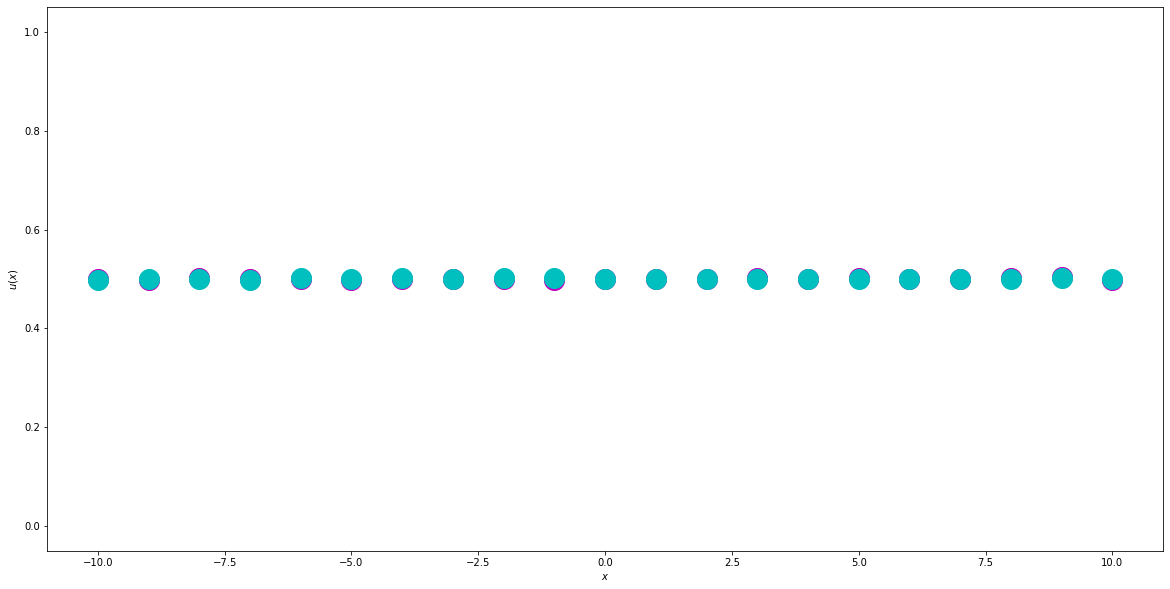

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from random import gauss

# Parameters
T = 30
Nt = 100
Nx = 1000
D = 0.01

# Discretization
t = np.linspace(0,T,Nt)
x = np.linspace(-11,11,Nx)
dt = t[1]-t[0]
dx = x[1]-x[0]

Cells = np.linspace(-10,10,21)
nofCells = len(Cells)
a = np.exp(6)
b = np.exp(8)
c = np.exp(2)
d = np.exp(2)

def rhs(x, t):
    rhs = np.empty(len(x))
    N = x[:nofCells]
    G = x[nofCells:]
        
    GL = np.roll(G,1)
    GR = np.roll(G,-1)
    
    S = (GR+GL)/2
    S[0] = G[1]
    S[-1] = G[-2]
    
    pN = (a*N)*(1+d*c*S)/(1 + a*N*(1+d*c*S) + b*G + c*S)
    pG =      (b*G)     /(1 + a*N*(1+d*c*S) + b*G + c*S)

    rhs[:nofCells] = pN - N
    rhs[nofCells:] = pG - G
    
    return rhs

u0 = np.array([gauss(0.5,0.001) if i < nofCells else 
               gauss(0.5,0.001) for i in range(2*nofCells)])
u = odeint(rhs, u0, t)
N = u[:,:nofCells]
G = u[:,nofCells:]

# Visualization
fig, ax = plt.subplots(figsize=(20,10))
def update(i):
    plt.cla()
    plt.plot(Cells,N[i,:],'mo', ms=20)
    plt.plot(Cells,G[i,:],'co', ms=20)
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.ylim(-0.05,1.05)
    
ani = FuncAnimation(fig, update, frames=Nt, interval=40)
HTML(ani.to_jshtml())

In [133]:
a = np.array([1,2,3,4,5,6,7,8,9])
print(a[:3])
print(a[3:5])
print(a[5:])

[1 2 3]
[4 5]
[6 7 8 9]


In [3]:
from Functions import fate
import numpy as np
import networkx as nx
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)
N = np.zeros(FVmesh.nofCells)
for i in range(FVmesh.nofCells):
    #if Pos[i,0]**2 + Pos[i,1]**2 > 5**2:
    if i%9 == 0:
        N[i] = 1
G = 1-N

def graphdistance(FVmesh):
    Gr = nx.Graph()
    for path in FVmesh.Tri.simplices:
    
        path1 = [path[0], path[1]]
        path2 = [path[1], path[2]]
        path3 = [path[2], path[0]]

        if Dist[path1[0],path1[1]] < 2.2:
            nx.add_path(Gr, path1)
        if Dist[path2[0],path2[1]] < 2.2:    
            nx.add_path(Gr, path2)
        if Dist[path3[0],path3[1]] < 2.2:
            nx.add_path(Gr, path3)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([FVmesh.nofCells, FVmesh.nofCells])
    for i in range(FVmesh.nofCells):
        for j in range(FVmesh.nofCells):
            dist[i,j] = dist_dict[i][j]
            
    return dist
    

def paircorrelation(N, G, GraphDist):
    x = np.array(fate(N, G))
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    dist = GraphDist[ind].T[ind].T
    rho0 = sum(x)/len(x)
    rho1 = (sum(x)-1)/(len(x)-1)
    
    P = np.empty(maxdist)
    for i in range(1,maxdist+1):
        P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1
        
    return P

GraphDist = graphdistance(FVmesh)
P = paircorrelation(N, G, GraphDist)


print(sum(G)/sum(N))
x = [i for i in range(1,int(np.max(GraphDist))+1)]
plt.plot(x,P)
plt.figure()
FVmesh.plot(N)

NameError: name 'Dist' is not defined

C:\Users\sis85wc\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


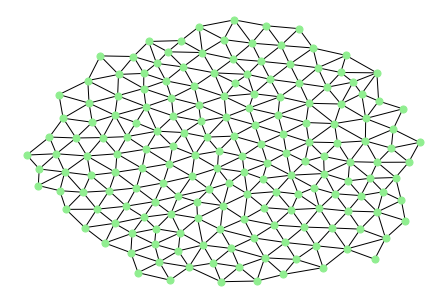

In [4]:
import networkx as nx
import pandas as pd
from FVmesh import initializeFVmesh
from Functions import distance

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)
Dist = distance(Pos)

G = nx.Graph()
for path in FVmesh.Tri.simplices:
    
    path1 = [path[0], path[1]]
    path2 = [path[1], path[2]]
    path3 = [path[2],path[0]]
    
    if Dist[path1[0],path1[1]] < 2.2:
        nx.add_path(G, path1)
    if Dist[path2[0],path2[1]] < 2.2:    
        nx.add_path(G, path2)
    if Dist[path3[0],path3[1]] < 2.2:
        nx.add_path(G, path3)

nx.draw(G, pos = Pos, with_labels=False, node_size=50, node_color='lightgreen')

0.7760443687438965
0.028956174850463867
[159  14  51]
[138  41 127 ...  99  37  68]
[   0    7   13   20   26   32   39   44   50   56   61   66   71   77
   83   89   94  100  106  111  117  124  130  136  144  149  154  159
  165  170  177  183  189  195  201  206  211  216  222  226  232  238
  244  250  256  260  265  271  276  282  288  293  298  305  312  319
  326  330  335  341  348  354  359  364  371  377  381  386  393  399
  404  410  416  423  428  434  439  444  450  456  462  469  473  478
  484  489  495  502  507  512  519  524  531  535  541  547  553  559
  565  571  575  580  586  592  597  603  609  616  622  628  635  641
  647  654  660  665  672  678  684  690  696  702  708  713  719  725
  731  738  745  752  757  762  768  774  780  785  791  797  803  809
  816  822  828  834  840  845  851  856  861  867  873  877  882  888
  893  899  905  911  918  923  928  933  939  945  950  956  960  966
  972  977  982  988  994  999 1004 1009 1014 1020]


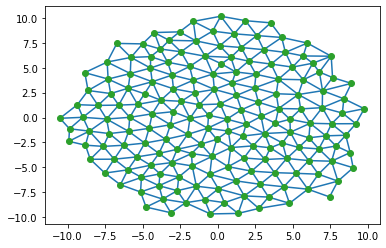

In [82]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import time

points = Pos
tri = Delaunay(points)

cutoff = 2.2

simplices = []
for path in tri.simplices:

    path1 = [path[0], path[1]]
    path2 = [path[1], path[2]]
    path3 = [path[2], path[0]]

    if Dist[path1[0],path1[1]] < cutoff and Dist[path2[0],path2[1]] < cutoff and Dist[path3[0],path3[1]] < cutoff:
        simplices.append(path)

simplices = test[(Dist[tri.simplices[:,0],tri.simplices[:,1]] < cutoff) &
                 (Dist[tri.simplices[:,1],tri.simplices[:,2]] < cutoff) &
                 (Dist[tri.simplices[:,0],tri.simplices[:,2]] < cutoff)]


print(tri.simplices[0])
print(tri.vertex_neighbor_vertices[1])
print(tri.vertex_neighbor_vertices[0])
#print(tri.vertex_neighbor_vertices[0][1])
#print(tri.vertex_neighbor_vertices[0][2])
plt.triplot(points[:,0], points[:,1], simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

3916.0
